# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 593


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
from pprint import pprint 

# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units="metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        #Add 1 second interval
        time.sleep(1)
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | chokurdakh
Processing Record 2 of Set 1 | narsaq
Processing Record 3 of Set 1 | port alfred
Processing Record 4 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 5 of Set 1 | arraial do cabo
Processing Record 6 of Set 1 | atasu
Processing Record 7 of Set 1 | nikolskoye
Processing Record 8 of Set 1 | faanui
Processing Record 9 of Set 1 | rurrenabaque
Processing Record 10 of Set 1 | aklavik
Processing Record 11 of Set 1 | bethel
Processing Record 12 of Set 1 | neyshabur
Processing Record 13 of Set 1 | petropavlovsk-kamchatskiy
Processing Record 14 of Set 1 | kodiak
Processing Record 15 of Set 1 | punta arenas
Processing Record 16 of Set 1 | tuatapere
Processing Record 17 of Set 1 | vardo
Processing Record 18 of Set 1 | acapulco
Processing Record 19 of Set 1 | buala
Processing Record 20 of Set 1 | ilulissat
Processing Record 21 of Set 1 | jamestown
Processing Record 22 of Set 1 | mop

Processing Record 36 of Set 4 | phalodi
Processing Record 37 of Set 4 | seoul
Processing Record 38 of Set 4 | pachino
Processing Record 39 of Set 4 | wilmington
Processing Record 40 of Set 4 | khurba
Processing Record 41 of Set 4 | ubatuba
Processing Record 42 of Set 4 | hervey bay
Processing Record 43 of Set 4 | kudahuvadhoo
Processing Record 44 of Set 4 | bilma
Processing Record 45 of Set 4 | haibowan
City not found. Skipping...
Processing Record 46 of Set 4 | mattru
Processing Record 47 of Set 4 | luangwa
Processing Record 48 of Set 4 | lagoa
Processing Record 49 of Set 4 | mookane
Processing Record 0 of Set 5 | bay city
Processing Record 1 of Set 5 | boa vista
Processing Record 2 of Set 5 | key largo
Processing Record 3 of Set 5 | zhanaozen
Processing Record 4 of Set 5 | provideniya
Processing Record 5 of Set 5 | grand river south east
City not found. Skipping...
Processing Record 6 of Set 5 | dikson
Processing Record 7 of Set 5 | maragogi
Processing Record 8 of Set 5 | talnakh
Pro

Processing Record 25 of Set 8 | bayaguana
Processing Record 26 of Set 8 | piazza armerina
Processing Record 27 of Set 8 | port hedland
Processing Record 28 of Set 8 | tilichiki
Processing Record 29 of Set 8 | kabanjahe
Processing Record 30 of Set 8 | solnechnyy
Processing Record 31 of Set 8 | richards bay
Processing Record 32 of Set 8 | mrirt
City not found. Skipping...
Processing Record 33 of Set 8 | samalaeulu
City not found. Skipping...
Processing Record 34 of Set 8 | young
Processing Record 35 of Set 8 | babanusah
City not found. Skipping...
Processing Record 36 of Set 8 | ust-bolsheretsk
City not found. Skipping...
Processing Record 37 of Set 8 | peterhead
Processing Record 38 of Set 8 | port keats
Processing Record 39 of Set 8 | sorvag
City not found. Skipping...
Processing Record 40 of Set 8 | coracora
Processing Record 41 of Set 8 | yashkul
Processing Record 42 of Set 8 | nanortalik
Processing Record 43 of Set 8 | chase
Processing Record 44 of Set 8 | balkanabat
Processing Reco

Processing Record 9 of Set 12 | buariki
City not found. Skipping...
Processing Record 10 of Set 12 | kanniyakumari
Processing Record 11 of Set 12 | cayenne
Processing Record 12 of Set 12 | halalo
City not found. Skipping...
Processing Record 13 of Set 12 | mweka
Processing Record 14 of Set 12 | san rafael
Processing Record 15 of Set 12 | usinsk
Processing Record 16 of Set 12 | katsuura
Processing Record 17 of Set 12 | canutama
Processing Record 18 of Set 12 | sydney
Processing Record 19 of Set 12 | chama
Processing Record 20 of Set 12 | bambanglipuro
Processing Record 21 of Set 12 | mayo
Processing Record 22 of Set 12 | curico
Processing Record 23 of Set 12 | hun
Processing Record 24 of Set 12 | eenhana
Processing Record 25 of Set 12 | morondava
Processing Record 26 of Set 12 | northam
Processing Record 27 of Set 12 | la orilla
Processing Record 28 of Set 12 | dzhusaly
City not found. Skipping...
Processing Record 29 of Set 12 | memphis
Processing Record 30 of Set 12 | korla
Processing

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          535
Lat           535
Lng           535
Max Temp      535
Humidity      535
Cloudiness    535
Wind Speed    535
Country       535
Date          535
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,chokurdakh,70.6333,147.9167,-44.68,100,53,1.20,RU,1678033255
1,narsaq,60.9167,-46.0500,11.12,81,79,2.90,GL,1678033257
2,port alfred,-33.5906,26.8910,24.98,88,66,3.52,ZA,1678033258
3,arraial do cabo,-22.9661,-42.0278,34.98,70,0,3.60,BR,1678033261
4,atasu,48.6814,71.6433,-0.74,91,100,5.99,KZ,1678033262


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,chokurdakh,70.6333,147.9167,-44.68,100,53,1.20,RU,1678033255
1,narsaq,60.9167,-46.0500,11.12,81,79,2.90,GL,1678033257
2,port alfred,-33.5906,26.8910,24.98,88,66,3.52,ZA,1678033258
3,arraial do cabo,-22.9661,-42.0278,34.98,70,0,3.60,BR,1678033261
4,atasu,48.6814,71.6433,-0.74,91,100,5.99,KZ,1678033262


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

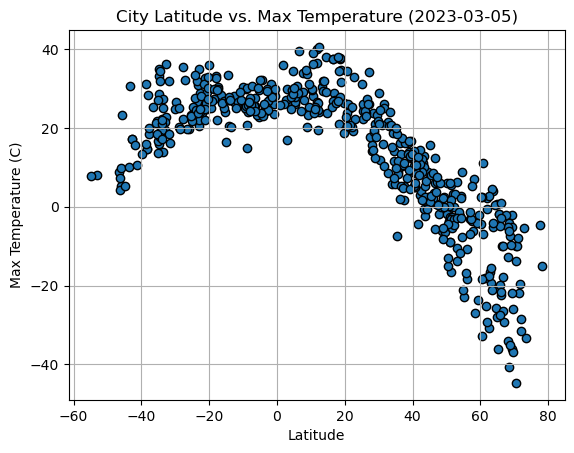

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black")

# Incorporate the other graph properties
import datetime
newDate = datetime.datetime.fromtimestamp(city_data_df["Date"][0])
plt.title(f"City Latitude vs. Max Temperature ({newDate:%Y-%m-%d})")
plt.grid(visible=True, axis='both')
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

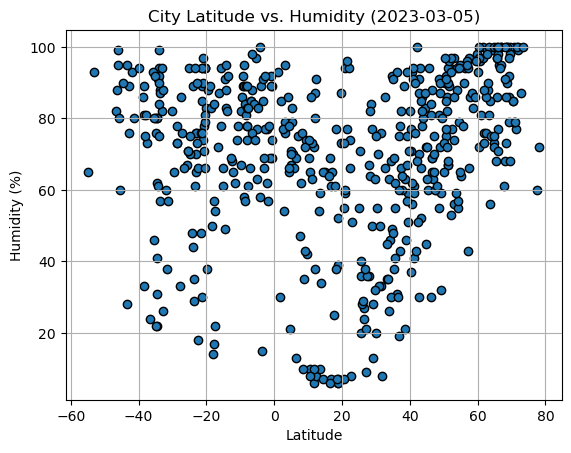

In [9]:
# Build scatter plot for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity ({newDate:%Y-%m-%d})")
plt.grid(visible=True, axis='both')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

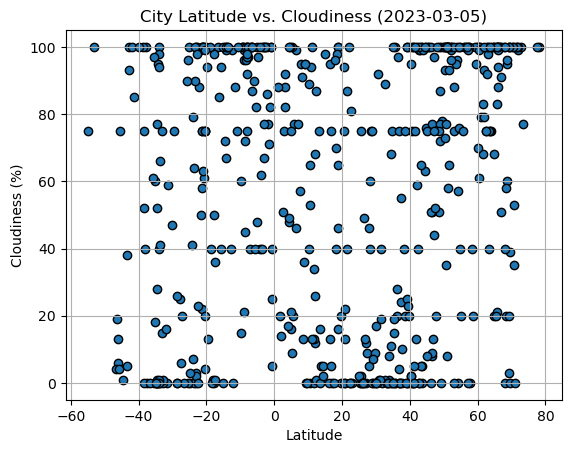

In [10]:
# Build scatter plot for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness ({newDate:%Y-%m-%d})")
plt.grid(visible=True, axis='both')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

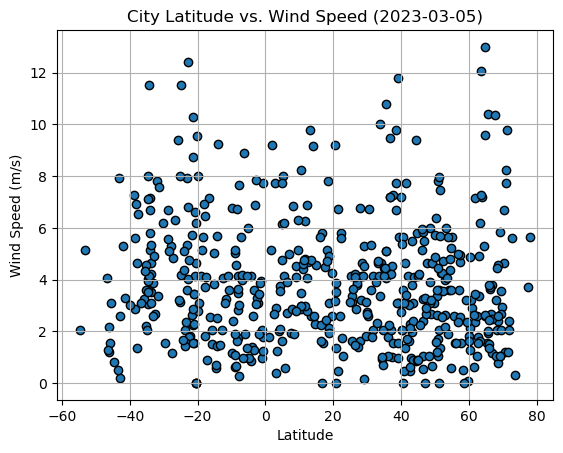

In [11]:
# Build scatter plot for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed ({newDate:%Y-%m-%d})")
plt.grid(visible=True, axis='both')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def lin_regress(x,y,a,b,c): # a is ylabel name, b and c are annotation coordinates
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
    regressValues = x*slope + intercept
    lineEQ = f"y = {slope:.2f}x + {intercept:.2f}"
    
    print(f"The r-value is {abs(rvalue)}")
    
    plt.scatter(x,y)
    plt.plot(x, regressValues, "r-")
    plt.xlabel("Latitude")
    plt.ylabel(a)
    plt.annotate(lineEQ,(b,c), fontsize=15, color="red")
    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>=0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,chokurdakh,70.6333,147.9167,-44.68,100,53,1.20,RU,1678033255
1,narsaq,60.9167,-46.0500,11.12,81,79,2.90,GL,1678033257
4,atasu,48.6814,71.6433,-0.74,91,100,5.99,KZ,1678033262
5,nikolskoye,59.7035,30.7861,-2.06,98,100,0.08,RU,1678033029
8,aklavik,68.2191,-135.0107,-34.00,68,0,2.06,CA,1678033268


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,port alfred,-33.5906,26.8910,24.98,88,66,3.52,ZA,1678033258
3,arraial do cabo,-22.9661,-42.0278,34.98,70,0,3.60,BR,1678033261
6,faanui,-16.4833,-151.7500,28.47,72,100,7.16,PF,1678033265
7,rurrenabaque,-14.4413,-67.5278,27.17,91,100,0.59,BO,1678033266
13,punta arenas,-53.1500,-70.9167,8.06,93,100,5.14,CL,1678033130


###  Temperature vs. Latitude Linear Regression Plot

The r-value is 0.8857262607486132


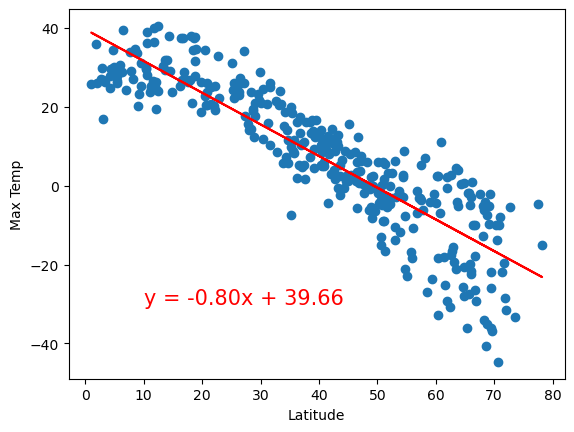

In [15]:
# Northern Hemisphere
lin_regress(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"], "Max Temp", 10, -30)

The r-value is 0.5347169963554138


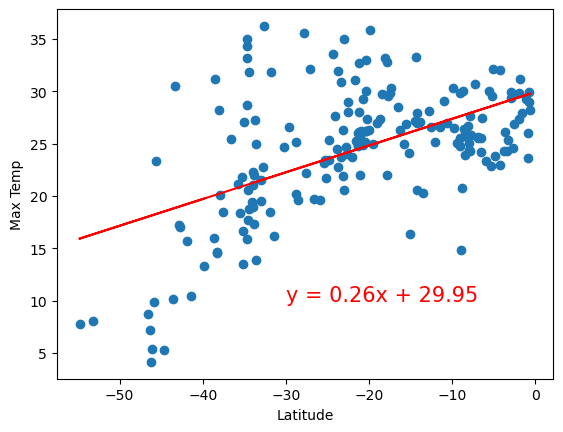

In [16]:
# Southern Hemisphere
lin_regress(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"], "Max Temp", -30, 10)

**Discussion about the linear relationship:** The relationship between the Latitude and Max Temperature in the northern hemisphere is a negative linear relationship. The correlation coefficient is 0.88, which points to a very strong correlation between both variables. The relationship between the Latitude and Max Temperature in the southern hemisphere is a positive linear relationship. The correlation coefficient is 0.53, which points to a moderate correlation between both variables. The northern hemisphere has a stronger correlation between Latitude and Max Temperature. Both dataframes show that as we approach the equator, the max temperature increases. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is 0.503882200192091


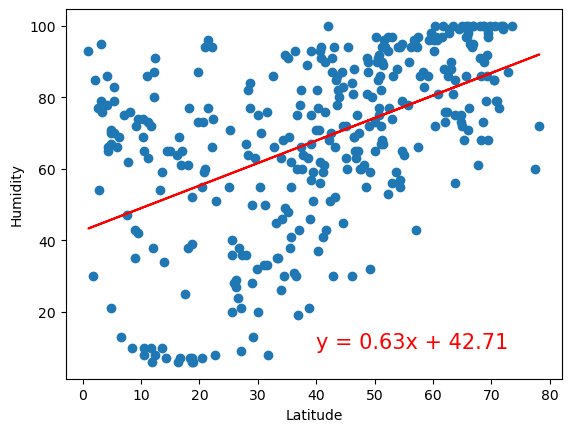

In [17]:
# Northern Hemisphere
lin_regress(northern_hemi_df["Lat"],northern_hemi_df["Humidity"], "Humidity", 40, 10)

The r-value is 0.05890383492594574


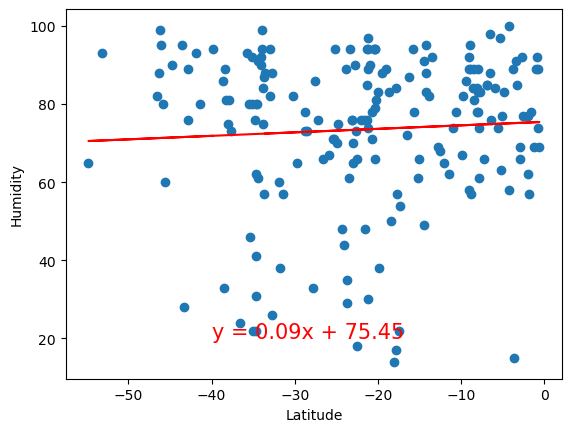

In [18]:
# Southern Hemisphere
lin_regress(southern_hemi_df["Lat"],southern_hemi_df["Humidity"], "Humidity", -40, 20)

**Discussion about the linear relationship:** The relationship between the Latitude and Humidity in the northern hemisphere is a positive linear relationship and the correlation coefficient of 0.5 points to a moderate correlation between both variables. The relationship between the Latitude and Humidity in the southern hemisphere is also a positive linear relationship. However, the correlation coefficient is 0.05, which points to a very weak correlation between both variables. The northern hemisphere has a stronger correlation between Latitude and Humidity.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is 0.3282625892773409


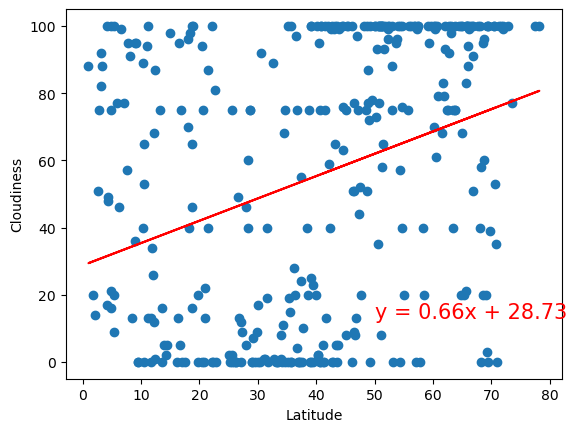

In [19]:
# Northern Hemisphere
lin_regress(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"], "Cloudiness", 50, 13)

The r-value is 0.35794113490658946


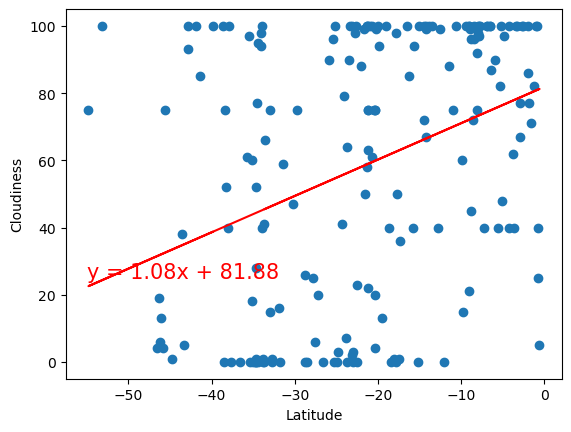

In [20]:
# Southern Hemisphere
lin_regress(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"], "Cloudiness", -55, 25)

**Discussion about the linear relationship:** The relationship between the Latitude and Cloudiness in the northern hemisphere is a positive linear relationship. The correlation coefficient is 0.32, which points to a weak correlation between both variables. The relationship between the Latitude and Cloudiness in the southern hemisphere is a positive linear relationship as well. The correlation coefficient is 0.35, which also points to a weak correlation between both variables. While the southern hemisphere has a slightly stronger correlation between Latitude and Humidity, both hemispheres have weak correlations between both variables pointing to a weak relationship.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is 0.062339617797226896


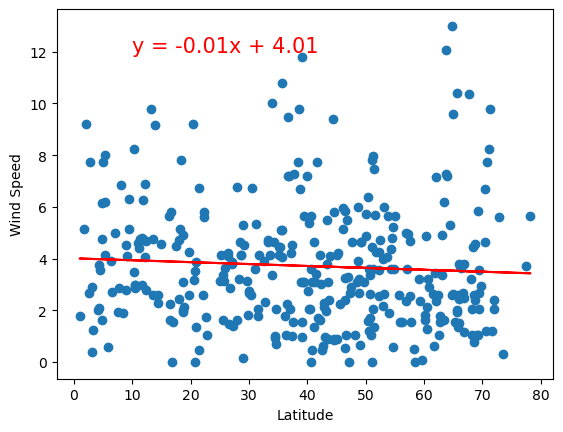

In [23]:
# Northern Hemisphere
lin_regress(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"], "Wind Speed", 10, 12)

The r-value is 0.11262395446569952


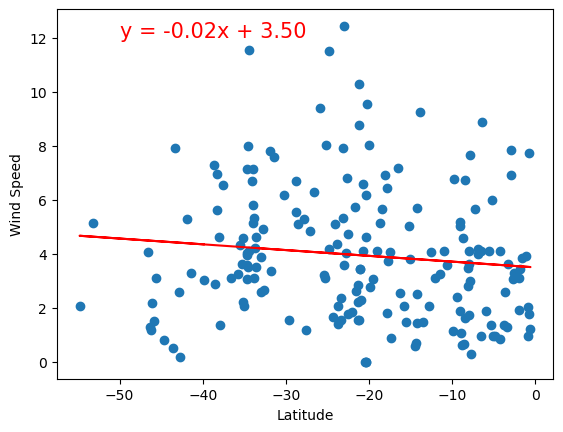

In [22]:
# Southern Hemisphere
lin_regress(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"], "Wind Speed", -50, 12)

**Discussion about the linear relationship:** The relationship between the Latitude and Wind Speed in the northern hemisphere is a negative linear relationship. The correlation coefficient is 0.06, which points to a very weak correlation between both variables. The relationship between the Latitude and Wind Speed in the southern hemisphere is a negative linear relationship as well. The correlation coefficient is 0.1, which also points to a very weak correlation between both variables. While the southern hemisphere has a slightly stronger correlation between Latitude and Wind Speed, both have very weak correlations.